<a href="https://colab.research.google.com/github/yeedacoding/TensorFlow-DL/blob/main/DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 심층신경망(DNN)을 활용하여 패션 MNIST 데이터셋 분류

In [1]:
# 데이터셋 불러오기

from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [2]:
# 이미지 픽셀값 0 ~ 255 -> 0 ~ 1
# 28 x 28 크기의 2차원 배열 -> 784 크기의 1차원 배열
# 사이킷런의 train_test_split() 메서드로 훈련세트와 검증세트 나누기

from sklearn.model_selection import train_test_split

train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)

### 기존의 인공신경망 모델에 층을 2개 추가

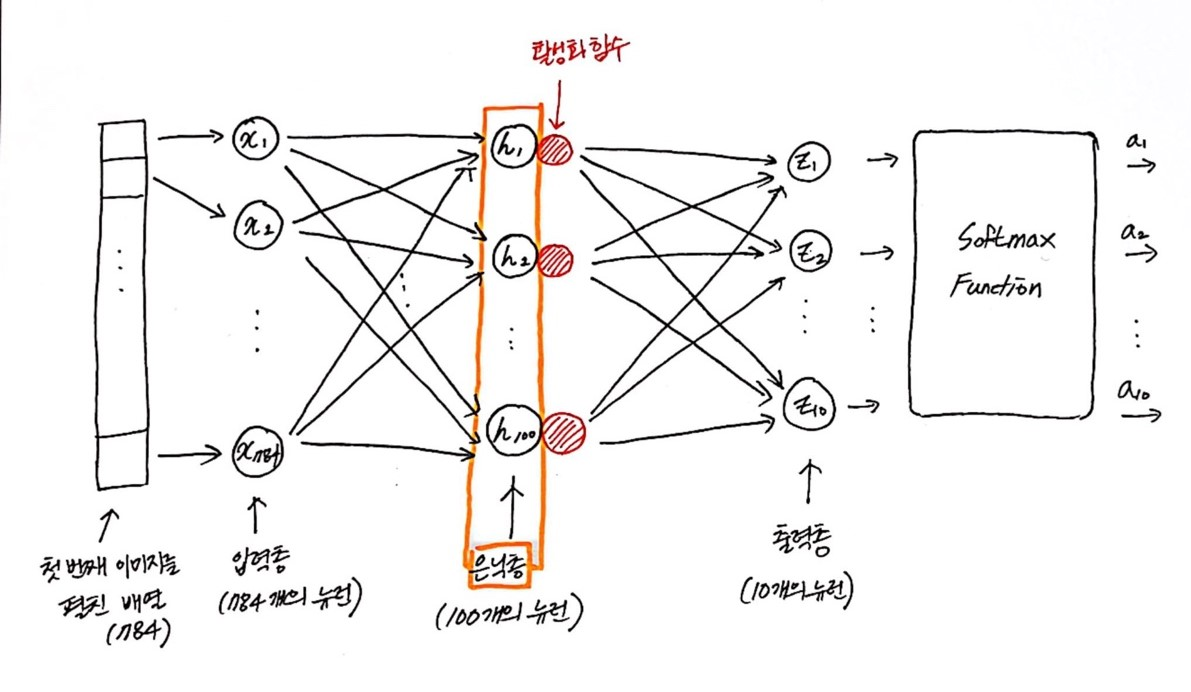

- 입력층과 출력층 사이에 있는 모든 층 = 은닉층(hidden layer)
- 출력층에 활성화 함수를 적용하듯이 은닉층에도 활성화 함수를 적용할 수 있음
- 출력층에 적용하느 ㄴ활성화 함수는 종류가 제한되어 있지만 은닉층의 활성화 함수는 비교적 자유로움
- 모든 신경망의 은닉층에는 항상 활성화 함수가 있음
- 은닉층에 많이 사용되는 활성화 함수는 시그모이드 함수와 렐루 함수가 있음

In [4]:
# 은닉층에 시그모이드 함수, 출력층에 소프트맥스 함수 적용하여 케라의 Dense 클래스 만들어보기

dense1 = keras.layers.Dense(100, activation = 'sigmoid', input_shape = (784, ))
dense2 = keras.layers.Dense(10, activation = 'softmax')

- dense1 : 은닉층, 100개의 뉴런을 가진 밀집층, 활성화 함수는 sigmoid, 입력의 크기는 (784, )
- 은닉층의 뉴런 개수는 최소한 출력층의 뉴런 개수보다는 많아야함 -> 클래스 10개에 대한 확률을 예측해야 하는데 이전 은닉층의 뉴런이 10개보다 적다면 학습 정보에 누락이 발생하기 때문에
- dense2 : 출력층, 10개의 클래스를 분류하므로 10개의 뉴런을 가짐, 활성화 함수는 softmax

## 심층 신경망(Deep Neural Network, DNN) 만들기

- dense1, dense2 객체를 Sequential 클래스에 추가하여 심층 신경망 만들기
- Sequential 클래스의 객체를 만들 때 여러 개의 층을 추가하려면 층 객체를 리스트로 전달한다
- 출력층은 가장 마지막에 두어야 한다(은닉층 -> 출력층 순서로 나열해야함)

In [6]:
model = keras.Sequential([dense1, dense2])

In [7]:
# summary() 메서드로 층에 대한 정보 얻기

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


- 모델에 들어 있는 층이 순서대로 나열됨 (추가한 은닉층에서 출력층 순서대로)
- 층을 만들 때 name 매개변수로 층의 이름 지정 가능(지정하지 않으면 자동으로 dense)
- Output Shape의 첫 번째 차원은 샘플의 개수 -> None
- None인 이유 : 샘플 개수가 아직 정의되어 있지 않기 때문에
- 케라스 모델의 fit() 메서드에 훈련 데이터를 주입하면 이 데이터를 한 번에 모두 사용하지 않고 특정 개수로 나누어 여러 번 걸쳐 경사 하강법 단계를 수행 = 미니배치 경사 하강법(keras의 기본 미니배치 크기 : 32개 = 샘플을 32개씩 꺼내어 훈련)
- fit() 메서드에서 batch_size 매개변수로 배치의 크기를 바꿀 수 있음
- 샘플 개수를 고정하지 않고 어떤 배치 크기에도 유연하게 대응할 수 있도록 None으로 설정한 것
- (None, 100) 에서 100 : 은닉층의 뉴런 개수 (784개의 픽셀값이 은닉층을 통과하면서 100개의 특성으로 압축되었다는 뜻)
- Param # (모델 파라미터 개수) : Dense층이므로, 즉 fully connected 층이므로 입력 픽셀 784개와 100개의 가중치, 각 뉴런에 1개의 절편이 있으므로 총 100개의 절편이 있음
- 따라서 입력층에서 은닉층까지의 모델 파라미터 개수는 784(입력층) * 100(가중치) + 100(절편) = 78500개
- dense_1 레이어도 마찬가지(은닉층부터 출력층 사이)

### * Sequential 클래스에 층을 추가하는 다른 방법 *

- Dense 클래스의 객체 dense1, dense2를 만들어 Sequential 클래스에 전달했었음
- 하지만 이 두 객체를 따로 저장하여 쓸 일이 없기 때문에 Sequentail 클래스의 생성자 안에서 바로 Dense 클래스의 객체를 만들 수 있음

In [11]:
# 모델과 각 층에 이름 지정해보기

model = keras.Sequential([
                          keras.layers.Dense(100, activation = 'sigmoid', input_shape=(784, ), name = 'hidden',),
                          keras.layers.Dense(10, activation = 'softmax', name = 'output')
], name = '패션 MNIST 모델')

model.summary()

Model: "패션 MNIST 모델"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               78500     
_________________________________________________________________
output (Dense)               (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [16]:
# add() 메서드를 활용하여 Sequential 클래스에서 층을 추가해보기

model = keras.Sequential()
model.add(keras.layers.Dense(100, activation = 'sigmoid', input_shape = (784, )))
model.add(keras.layers.Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


## 모델 훈련하기

- 인공 신경망에 몇 개의 층을 추가하더라도 compile(), fit()메서드의 사용법은 동일하다

In [13]:
model.compile(loss='sparse_categorical_crossentropy', metrics = 'accuracy')
model.fit(train_scaled, train_target, epochs = 5)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5654 - accuracy: 0.8089
Epoch 2/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4089 - accuracy: 0.8534
Epoch 3/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3731 - accuracy: 0.8649
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3515 - accuracy: 0.8724
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3334 - accuracy: 0.8802


### * 렐루(ReLU) 함수 *

- 시그모이드 함수의 한계 : 데이터가 많아져 값이 극한으로 커지거나 극한으로 작아지면 함수값의 올바른 출력에 한계가 발생한다(시그모이드 함수 그래프)
- 렐루 함수 : 입력이 양수일 경우 그냥 입력을 통과시키고 음수일 경우에는 0으로 만들어버림
- max(0, z)
- 출력층의 z 값이 0보다 크면 : z를 출력
- 출력층의 z 값이 0보다 작으면 : 0을 출력


### * Flatten 층 *

- 배치 차원을 제외하고 나머지 입력 차원을 모두 일렬로 펼치는 역할
- 입력에 곱해지는 가중치나 절편이 없고
- 층처럼 입력층과 은닉층 사이에 추가하기 때문에 층이라고 부르지만 인공 신경망의 성능에 기여하는 것은 없다
- 입력층 바로 뒤에 추가한다

In [19]:
# 기존에는 28x28 이미지 크기를 reshape() 메서드로 1차원으로 바꿨음
# keras의 Flatten 층을 활용하여 1차원 배열로 바꿔보기

model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [20]:
# 위에서 만든 model (relu함수가 적용된)로 훈련해보기

(train_input, train_target), (test_input, test_input) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)

In [21]:
# 모델 컴파일
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

# 모델 훈련
model.fit(train_scaled, train_target, epochs = 5)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5367 - accuracy: 0.8117
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3946 - accuracy: 0.8575
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3548 - accuracy: 0.8730
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3321 - accuracy: 0.8810
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3190 - accuracy: 0.8848


In [22]:
# 모델 평가

model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3760 - accuracy: 0.8787


[0.3759666681289673, 0.8786666393280029]